In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

In [145]:
order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp'][::-1]

In [146]:
RMSE = np.zeros((len(result_names), len(risk_measures)))

for i, rn in enumerate(result_names):
    for j, rm in enumerate(risk_measures):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
        _df = pd.read_csv(path)
        RMSE[i,j] = np.var(_df.rh)

In [147]:
RMSE = pd.DataFrame(RMSE)
RMSE.columns = risk_measures
RMSE.index = result_names
RMSE = RMSE.reindex(order)

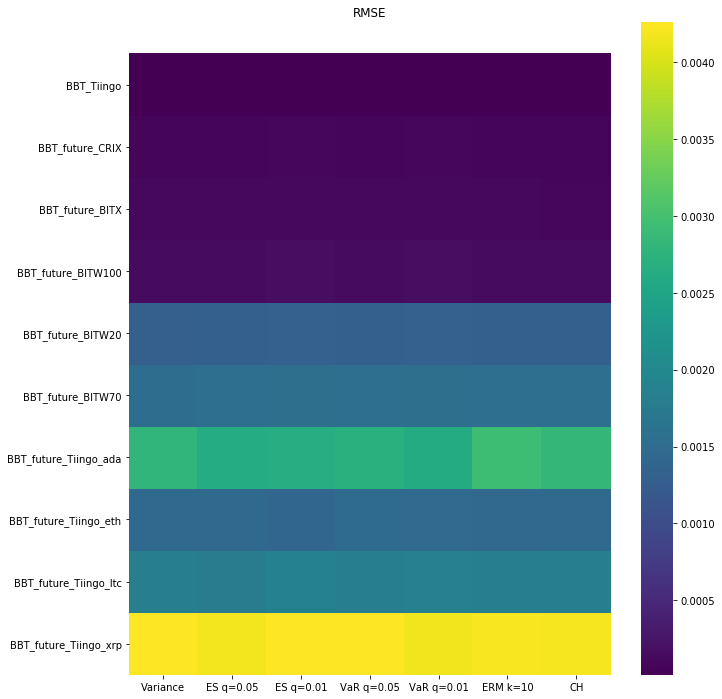

In [148]:
factor=1.2
xsize = (len(RMSE.columns)+2)*factor
ysize = len(RMSE.index)*factor

plt.figure(figsize=(xsize, ysize))
sns.heatmap(RMSE, cmap="viridis")

plt.title('RMSE')
plt.ylim((0,len(RMSE.index)+0.5))
plt.show()

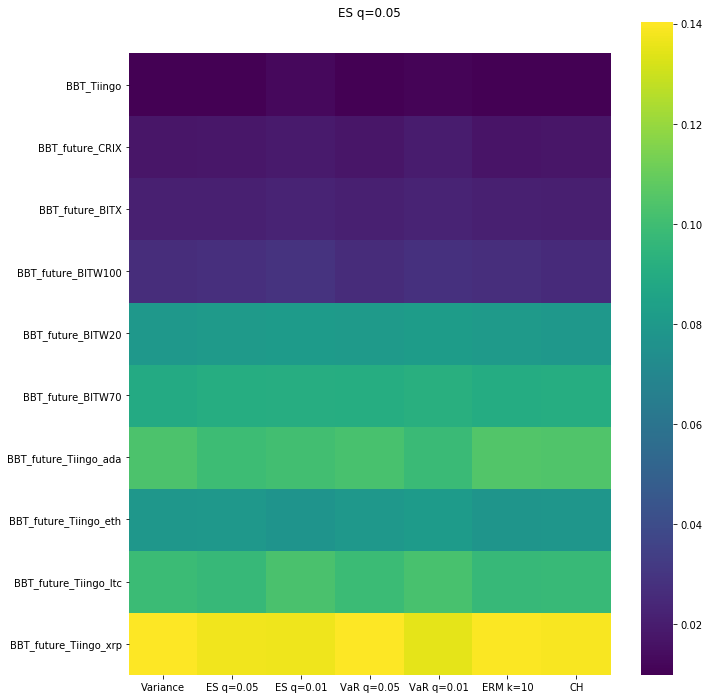

In [149]:
ES05 = np.zeros((len(result_names), len(risk_measures)))

for i, rn in enumerate(result_names):
    for j, rm in enumerate(risk_measures):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
        _df = pd.read_csv(path)
        ES05[i,j] = ES(0.05, _df.rh)
        
ES05 = pd.DataFrame(ES05)
ES05.columns = risk_measures
ES05.index = result_names
ES05 = ES05.reindex(order)

factor=1.2
xsize = (len(ES05.columns)+2)*factor
ysize = len(ES05.index)*factor

plt.figure(figsize=(xsize, ysize))
sns.heatmap(ES05, cmap="viridis")

plt.title('ES q=0.05')
plt.ylim((0,len(ES05.index)+0.5))
plt.show()

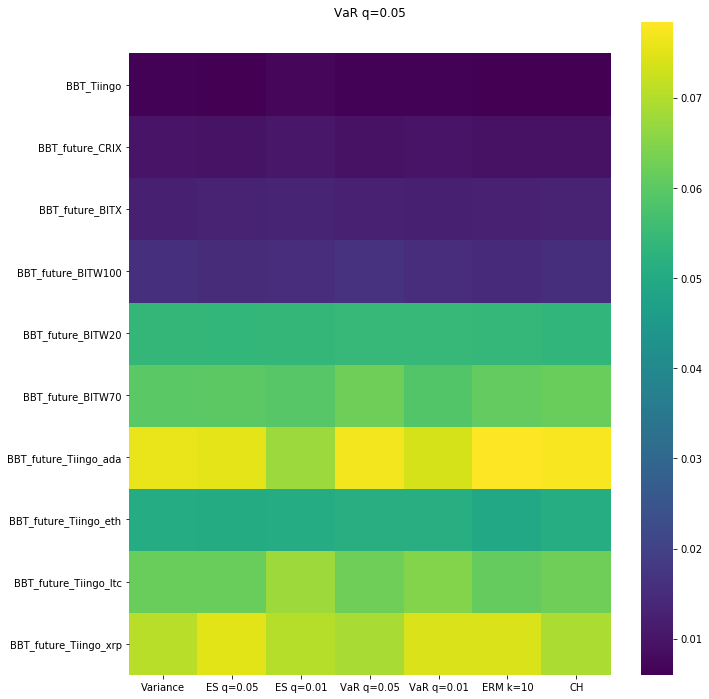

In [150]:
VaR05 = np.zeros((len(result_names), len(risk_measures)))

for i, rn in enumerate(result_names):
    for j, rm in enumerate(risk_measures):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
        _df = pd.read_csv(path)
        VaR05[i,j] = VaR(0.05, _df.rh)
        
VaR05 = pd.DataFrame(VaR05)
VaR05.columns = risk_measures
VaR05.index = result_names
VaR05 = VaR05.reindex(order)

factor=1.2
xsize = (len(VaR05.columns)+2)*factor
ysize = len(VaR05.index)*factor

plt.figure(figsize=(xsize, ysize))
sns.heatmap(VaR05, cmap="viridis")

plt.title('VaR q=0.05')
plt.ylim((0,len(VaR05.index)+0.5))
plt.show()

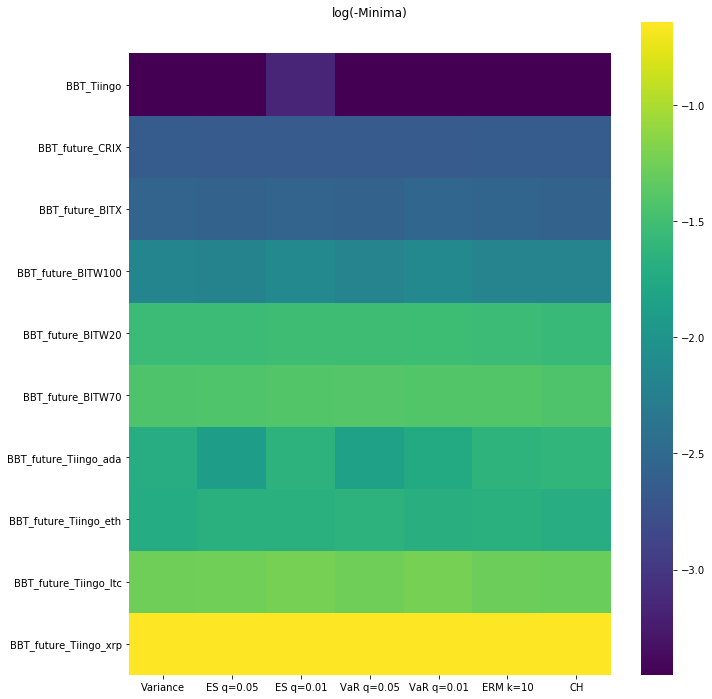

In [151]:
Min = np.zeros((len(result_names), len(risk_measures)))

for i, rn in enumerate(result_names):
    for j, rm in enumerate(risk_measures):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
        _df = pd.read_csv(path)
        Min[i,j] = np.log(-np.min(_df.rh))
        
Min = pd.DataFrame(Min)
Min.columns = risk_measures
Min.index = result_names
Min = Min.reindex(order)

factor=1.2
xsize = (len(Min.columns)+2)*factor
ysize = len(Min.index)*factor

plt.figure(figsize=(xsize, ysize))
sns.heatmap(Min, cmap="viridis")

plt.title(r'log(-Minima)')
plt.ylim((0,len(Min.index)+0.5))
plt.show()

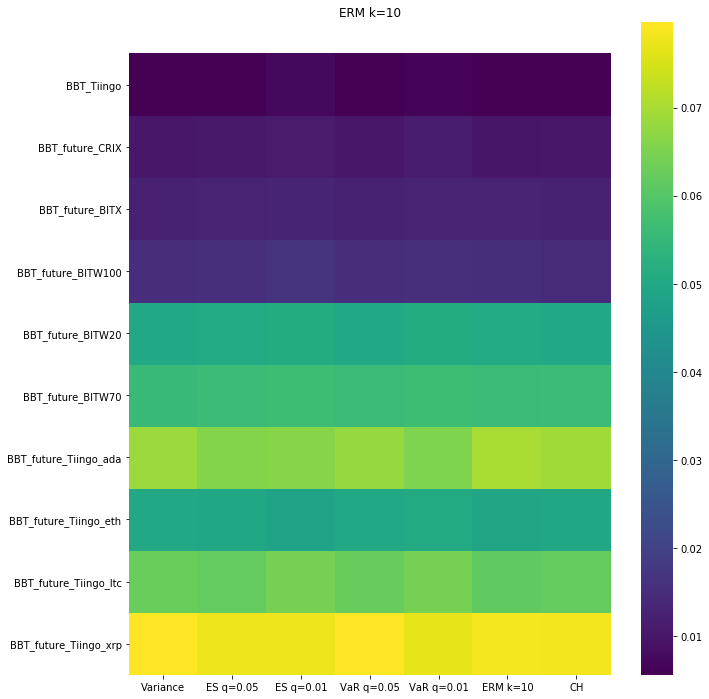

In [152]:
ERM10 = np.zeros((len(result_names), len(risk_measures)))

for i, rn in enumerate(result_names):
    for j, rm in enumerate(risk_measures):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
        _df = pd.read_csv(path)
        ERM10[i,j] = ERM_estimate_trapezoidal(10, _df.rh)
        
ERM10 = pd.DataFrame(ERM10)
ERM10.columns = risk_measures
ERM10.index = result_names
ERM10 = ERM10.reindex(order)

factor=1.2
xsize = (len(ERM10.columns)+2)*factor
ysize = len(ERM10.index)*factor

plt.figure(figsize=(xsize, ysize))
sns.heatmap(ERM10, cmap="viridis")

plt.title(r'ERM k=10')
plt.ylim((0,len(ERM10.index)+0.5))
plt.show()

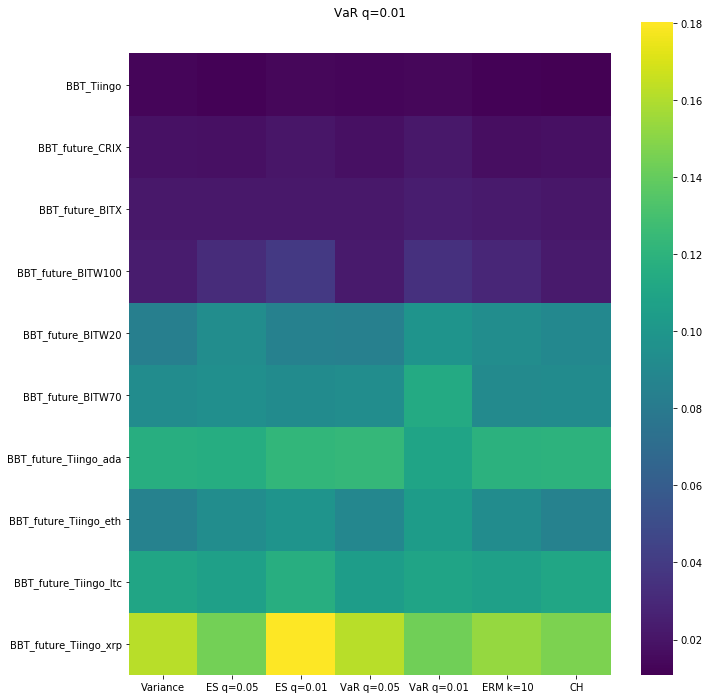

In [153]:
VaR01 = np.zeros((len(result_names), len(risk_measures)))

for i, rn in enumerate(result_names):
    for j, rm in enumerate(risk_measures):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
        _df = pd.read_csv(path)
        VaR01[i,j] = VaR(0.01, _df.rh)
        
VaR01 = pd.DataFrame(VaR01)
VaR01.columns = risk_measures
VaR01.index = result_names
VaR01 = VaR01.reindex(order)

factor=1.2
xsize = (len(VaR01.columns)+2)*factor
ysize = len(VaR01.index)*factor

plt.figure(figsize=(xsize, ysize))
sns.heatmap(VaR01, cmap="viridis")

plt.title(r'VaR q=0.01')
plt.ylim((0,len(VaR01.index)+0.5))
plt.show()

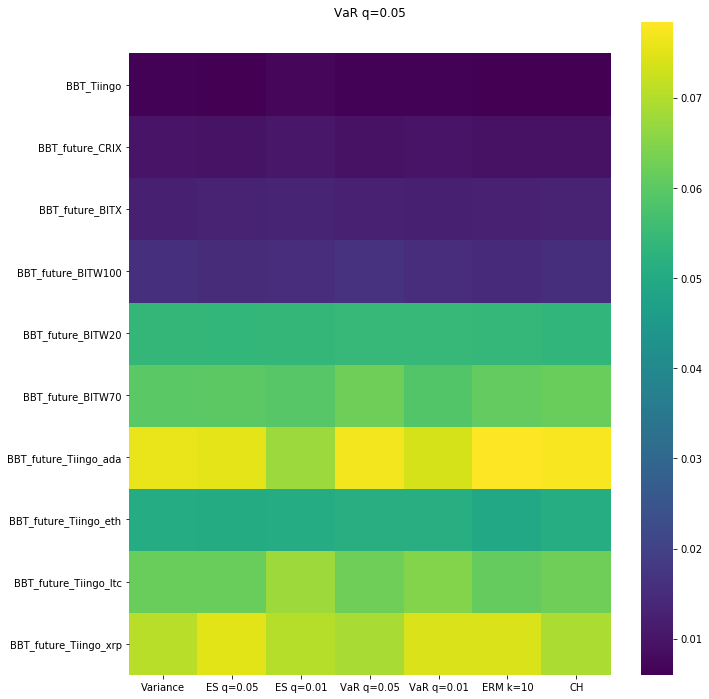

In [154]:
VaR05 = np.zeros((len(result_names), len(risk_measures)))

for i, rn in enumerate(result_names):
    for j, rm in enumerate(risk_measures):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
        _df = pd.read_csv(path)
        VaR05[i,j] = VaR(0.05, _df.rh)
        
VaR05 = pd.DataFrame(VaR05)
VaR05.columns = risk_measures
VaR05.index = result_names
VaR05 = VaR05.reindex(order)

factor=1.2
xsize = (len(VaR05.columns)+2)*factor
ysize = len(VaR05.index)*factor

plt.figure(figsize=(xsize, ysize))
sns.heatmap(VaR05, cmap="viridis")

plt.title(r'VaR q=0.05')
plt.ylim((0,len(VaR05.index)+0.5))
plt.show()